In [2]:
import glob, os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Differential expressed genes (Figure 4a)

In [3]:
m = pd.read_csv("../../1_circRNAseq/results/3_ciri/4_ciri_de/gene_de.csv", index_col=0)
m["logFC"] = [max(-4, min(4, v)) for v in m["logFC"]]
m["FDR"] = [max(1e-10, v) for v in m["FDR"]]
m = m[m["logCPM"] >= np.log(10)]
print(m.shape)

(11842, 6)


(11842, 6) (11, 6) (23, 6)


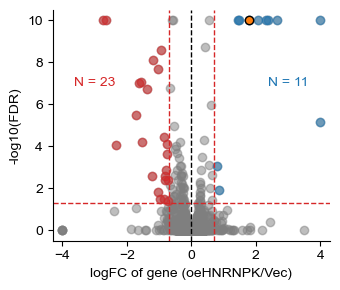

In [4]:
m1 = m[(m["logFC"] > np.log(2)) & (m["FDR"] < 0.05)]
m2 = m[(m["logFC"] < -np.log(2)) & (m["FDR"] < 0.05)]
print(m.shape, m1.shape, m2.shape)
xs, ys = m["logFC"], -np.log10(m["FDR"])
xs1, ys1 = m1["logFC"], -np.log10(m1["FDR"])
xs2, ys2 = m2["logFC"], -np.log10(m2["FDR"])
plt.figure(figsize=(3.5, 3))
plt.scatter(xs, ys, alpha=0.5, color="C7", zorder=1)
plt.scatter(xs1, ys1, alpha=0.5, color="C0", zorder=2)
plt.scatter(xs2, ys2, alpha=0.5, color="C3", zorder=3)
plt.text(3, 7, "N = %d" % len(xs1), va="center", ha="center", color="C0")
plt.text(-3, 7, "N = %d" % len(xs2), va="center", ha="center", color="C3")
if True:
    tmp = m.loc["ENSG00000165119.21|HNRNPK"]
    x, y = tmp["logFC"], -np.log10(tmp["FDR"])
    plt.scatter(x, y, color="C1", edgecolor="black", zorder=4)
plt.axvline(0, color="black", lw=1, ls="--")
plt.axvline(np.log(2), color="C3", lw=1, ls="--")
plt.axvline(-np.log(2), color="C3", lw=1, ls="--")
plt.axhline(-np.log10(0.05), color="C3", lw=1, ls="--")
plt.xlim(-4.3, 4.3)
plt.ylim(-0.5, 10.5)
plt.xlabel("logFC of gene (oeHNRNPK/Vec)")
plt.ylabel("-log10(FDR)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/de_gene.pdf")

In [4]:
print("Up regulated genes:")
for g in m1.index:
    print(g)

Up regulated genes:
ENSG00000165119.21|HNRNPK
ENSG00000259522.3|ENSG00000259522
ENSG00000286185.1|ENSG00000286185
ENSG00000161888.12|SPC24
ENSG00000226688.8|ENTPD1-AS1
ENSG00000227347.1|HNRNPKP2
ENSG00000258643.6|BCL2L2-PABPN1
ENSG00000243547.1|HNRNPKP4
ENSG00000288534.1|ENSG00000288534
ENSG00000279738.1|ENSG00000279738
ENSG00000265735.2|RN7SL5P


In [6]:
print("Down regulated genes:")
for g in m2.index:
    print(g)

Down regulated genes:
ENSG00000107796.13|ACTA2
ENSG00000167995.17|BEST1
ENSG00000134574.12|DDB2
ENSG00000174307.7|PHLDA3
ENSG00000124762.14|CDKN1A
ENSG00000260669.2|ENSG00000260669
ENSG00000286264.2|ENSG00000286264
ENSG00000138185.20|ENTPD1
ENSG00000256646.8|ENSG00000256646
ENSG00000280046.1|ENSG00000280046
ENSG00000163071.11|SPATA18
ENSG00000103061.13|SLC7A6OS
ENSG00000258674.5|ENSG00000258674
ENSG00000184545.11|DUSP8
ENSG00000213599.10|SLX1A-SULT1A3
ENSG00000164938.14|TP53INP1
ENSG00000085465.13|OVGP1
ENSG00000271383.8|NBPF19
ENSG00000175105.8|ZNF654
ENSG00000187775.17|DNAH17
ENSG00000167807.15|ENSG00000167807
ENSG00000196152.10|ZNF79
ENSG00000196967.11|ZNF585A


# Merge circRNA-level DE and gene-level DE

In [5]:
for path in sorted(glob.glob("../../1_circRNAseq/results/3_ciri/2_ciri_quant/*/*.gtf")):
    fname = path.split("/")[-1][:-4]
    path2 = "results/%s.tsv" % fname
    if os.path.exists(path2):
        continue
    with open(path) as f, open(path2, "w+") as fw:
        fw.write("circ_id\tcpm\tcirc_type\tbsj\tfsj\tjunc_ratio\tgene_id\tgene_name\tgene_type\n")
        for line in f:
            if line.startswith("#"):
                continue
            row = line.strip("\n").split("\t")    
            d = dict()
            for item in row[8].split(";"):
                item = item.strip()
                if item == "":
                    continue
                k, v = item.split()
                d[k.strip()] = v.strip('"')
            row2 = [d["circ_id"], row[5], d["circ_type"], d["bsj"], d["fsj"], d["junc_ratio"], d.get("gene_id"), d.get("gene_name"), d.get("gene_type")]
            fw.write("\t".join(map(str, row2)) + "\n")

In [6]:
d1 = pd.read_csv("results/20210720_circRNAseq_oeHNRNPK_Rep1.tsv", sep="\t", index_col=0)[["cpm", "bsj", "fsj", "junc_ratio"]]
d1.columns = ["%s.t1" % c for c in d1.columns]
d2 = pd.read_csv("results/20210720_circRNAseq_oeHNRNPK_Rep2.tsv", sep="\t", index_col=0)[["cpm", "bsj", "fsj", "junc_ratio"]]
d2.columns = ["%s.t2" % c for c in d2.columns]
d3 = pd.read_csv("results/20210720_circRNAseq_oeNC_Rep1.tsv", sep="\t", index_col=0)[["cpm", "bsj", "fsj", "junc_ratio"]]
d3.columns = ["%s.c1" % c for c in d3.columns]
d4 = pd.read_csv("results/20210720_circRNAseq_oeNC_Rep2.tsv", sep="\t", index_col=0)[["cpm", "bsj", "fsj", "junc_ratio"]]
d4.columns = ["%s.c2" % c for c in d4.columns]
print("Shape of 4 samples:", d1.shape, d2.shape, d3.shape, d4.shape)
m = pd.concat([d1, d2, d3, d4], axis=1).fillna(0)
print("Shape of merged dataframe:", m.shape)
m = m[['cpm.c1', 'cpm.c2', 'cpm.t1', 'cpm.t2', 'bsj.c1', 'bsj.c2', 'bsj.t1', 'bsj.t2', 'fsj.c1', 'fsj.c2', 'fsj.t1', 'fsj.t2', 'junc_ratio.c1', 'junc_ratio.c2', 'junc_ratio.t1', 'junc_ratio.t2']]
m_raw = m

d1 = pd.read_csv("../../1_circRNAseq/results/3_ciri/4_ciri_de/circRNA_bsj.csv", index_col=0)
d1 = d1[["CONTROL1", "CONTROL2", "CASE1", "CASE2"]]
d1.columns = ["corrected_bsj.c1", "corrected_bsj.c2", "corrected_bsj.t1", "corrected_bsj.t2"]
d2 = pd.read_csv("../../1_circRNAseq/results/3_ciri/4_ciri_de/circRNA_ratio.csv", index_col=0)
d2 = d2[["CONTROL1", "CONTROL2", "CASE1", "CASE2"]]
d2.columns = ["corrected_ratio.c1", "corrected_ratio.c2", "corrected_ratio.t1", "corrected_ratio.t2"]
d3 = pd.read_csv("../../1_circRNAseq/results/3_ciri/4_ciri_de/circRNA_de.csv", index_col=0)
d3.index.name = "circ_id"
d4 = pd.read_csv("../../1_circRNAseq/results/3_ciri/4_ciri_de/circRNA_info.csv", index_col=0)
print("Shape of ciri_de:", d1.shape, d2.shape, d3.shape, d4.shape)
m = pd.concat([m_raw, d1, d2, d3, d4], axis=1)
print("Shape of merged dataframe:", m.shape)
m = m.sort_values(by="PValue")

Shape of 4 samples: (30480, 4) (35123, 4) (17549, 4) (20971, 4)
Shape of merged dataframe: (70920, 16)
Shape of ciri_de: (71916, 4) (71916, 4) (71916, 6) (71916, 5)
Shape of merged dataframe: (71916, 35)


In [7]:
# add gene_de
deg = pd.read_csv("../../1_circRNAseq/results/3_ciri/4_ciri_de/gene_de.csv", index_col=0)
deg.columns = ['gene_logFC', 'gene_logCPM', 'gene_LR', 'gene_PValue', 'gene_DE', 'gene_FDR']
gids = set(deg.index)

keys = []
for gid, gname in m[["gene_id", "gene_name"]].values:
    if isinstance(gid, str):
        ks1 = []
        for gid2, gname2 in zip(gid.split(","), gname.split(",")):
            ks1.append("%s|%s" % (gid2, gname2))
        if len(ks1) == 1:
            keys.append(ks1[0])
        else:
            ks2 = list(filter(lambda k: k in gids, ks1))
            if len(ks2) == 0:
                keys.append(ks1[0])
            elif len(ks2) == 1:
                keys.append(ks2[0])
            else:
                keys.append(ks2[0])
    else:
        keys.append(None)
m["gene_id_name"] = keys
m = m.merge(deg, left_on="gene_id_name", right_index=True, how="left")

In [8]:
m.to_csv("results/ciri_circ_full.tsv", sep="\t")

# Differential expressed circRNA (Figure 4b,c)

In [9]:
validated_genes = ["ZBTB11", "RPRD1A", "WAC", "CLIP1", "EP300", "RABGAP1", "SART3", "RNF4", "FOXRED2", "PUM1", 
                   "RUVBL2", "RC3H2", "EPB41", "VPS33A", "HNRNPH3", "ZC3H7A", "RBM5", "SPTAN1"]

In [10]:
m = pd.read_csv("results/ciri_circ_full.tsv", sep="\t", index_col=0)
m = m[m[["bsj.c1", "bsj.c2", "bsj.t1", "bsj.t2"]].max(axis=1) >= 10] # if threshold == 10, PACS2 will not be included.
print(m.shape)
Counter(m["circ_type"])

(1995, 42)


Counter({'exon': 1935, 'intron': 50, 'antisense': 7, 'intergenic': 3})

(1995, 42) (515, 42) (3, 42)


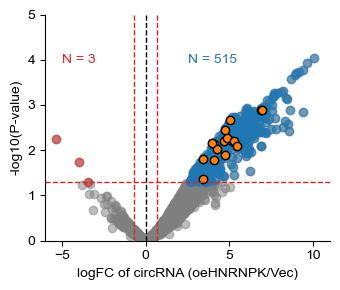

In [11]:
m1 = m[(m["logFC"] > np.log(2)) & (m["PValue"] < 0.05)]
m2 = m[(m["logFC"] < -np.log(2)) & (m["PValue"] < 0.05)]
print(m.shape, m1.shape, m2.shape)

xs, ys = m["logFC"], -np.log10(m["PValue"])
xs1, ys1 = m1["logFC"], -np.log10(m1["PValue"])
xs2, ys2 = m2["logFC"], -np.log10(m2["PValue"])

plt.figure(figsize=(3.5, 3))
plt.scatter(xs, ys, alpha=0.5, color="C7")
plt.scatter(xs1, ys1, alpha=0.5, color="C0")
plt.scatter(xs2, ys2, alpha=0.5, color="C3")
plt.text(4, 4, "N = %d" % len(xs1), color="C0", ha="center", va="center")
plt.text(-4, 4, "N = %d" % len(xs2), color="C3", ha="center", va="center")

for g in validated_genes:
    tmp = m[m["gene_name"] == g]
    if len(tmp) > 0:
        row = tmp.iloc[0]
        x = row["logFC"]
        y = -np.log10(row["PValue"])
        plt.scatter(x, y, color="C1", edgecolor="black")

plt.xlabel("logFC of circRNA (oeHNRNPK/Vec)")
plt.ylabel("-log10(P-value)")
plt.axhline(-np.log10(0.05), lw=1, ls="--", color="C3")
plt.axvline(0, lw=1, ls="--", color="black")
plt.axvline(np.log(2), lw=1, ls="--", color="C3")
plt.axvline(-np.log(2), lw=1, ls="--", color="C3")
plt.xlim(-6, 11)
plt.ylim(0, 5)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/de_circ.pdf")

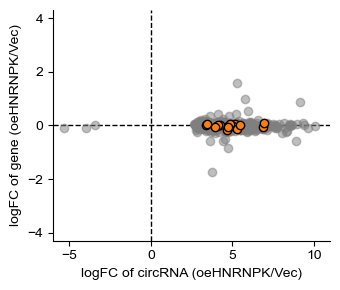

In [12]:
tmp = m[m["PValue"] < 0.05]
xs = tmp["logFC"]
ys = tmp["gene_logFC"]
plt.figure(figsize=(3.5, 3))
plt.scatter(xs, ys, alpha=0.5, color="C7", zorder=10)
for g in validated_genes:
    tmp1 = tmp[tmp["gene_name"] == g]
    if len(tmp1) > 0:
        row = tmp1.iloc[0]
        x = row["logFC"]
        y = row["gene_logFC"]
        plt.scatter(x, y, color="C1", edgecolor="black", zorder=20)
plt.axhline(0, lw=1, ls="--", color="black")
plt.axvline(0, lw=1, ls="--", color="black")
plt.xlim(-6, 11)
plt.ylim(-4.3, 4.3)
plt.yticks([-4, -2, 0, 2, 4])
plt.xlabel("logFC of circRNA (oeHNRNPK/Vec)")
plt.ylabel("logFC of gene (oeHNRNPK/Vec)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/de_circ_vs_gene.pdf")